<a href="https://colab.research.google.com/github/kimdahyeon977/kaggle-study/blob/master/plant_pathology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pytorch-lightning -q
! pip list | grep torch
! nvidia-smi

     |████████████████████████████████| 585 kB 5.3 MB/s 
     |████████████████████████████████| 140 kB 48.3 MB/s 
     |████████████████████████████████| 419 kB 40.7 MB/s 
     |████████████████████████████████| 596 kB 43.4 MB/s 
     |████████████████████████████████| 1.1 MB 36.2 MB/s 
     |████████████████████████████████| 144 kB 47.0 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 271 kB 32.5 MB/s 
pytorch-lightning             1.6.4
torch                         1.11.0+cu113
torchaudio                    0.11.0+cu113
torchmetrics                  0.9.1
torchsummary                  1.5.1
torchtext                     0.12.0
torchvision                   0.12.0+cu113
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#코랩 구글마운트 인증키 넣어서 해결해보기

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME ='엘리스_AI프로젝트 '
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/Shareddrives/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/Shareddrives/$FOLDERNAME

Mounted at /content/drive
[Errno 2] No such file or directory: 'drive/Shareddrives/엘리스_AI프로젝트'
/content


In [3]:
import random
import torch
def seed_everything(seed=7):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']= str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False

오피스 아워 : 3번째 셀은 되는데 2번째 셀은 왜....?ㅠㅠ

In [4]:
%matplotlib inline

import os
import json
import pandas as pd
from pprint import pprint

base_path = '/content/drive/Shareddrives/엘리스_AI프로젝트 /'
path_csv = os.path.join(base_path, 'train.csv')
train_data = pd.read_csv(path_csv)

In [5]:
import numpy as np

train_data['nb_classes'] = [len(lbs.split(" ")) for lbs in train_data['labels']]
lb_hist = dict(zip(range(10), np.bincount(train_data['nb_classes'])))
print(lb_hist)

{0: 0, 1: 17277, 2: 1155, 3: 200}


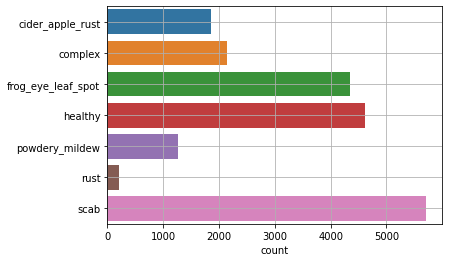

In [6]:
import itertools
import seaborn as sns

labels_all = list(itertools.chain(*[lbs.split(" ") for lbs in train_data['labels']]))
ax = sns.countplot(y=sorted(labels_all), orient='v')
ax.grid()

In [13]:
labels_unique=sorted(labels_all)
{lb: i for i, lb in enumerate(labels_unique)}

{'cider_apple_rust': 1859,
 'complex': 4010,
 'frog_eye_leaf_spot': 8362,
 'healthy': 12986,
 'powdery_mildew': 14257,
 'rust': 14474,
 'scab': 20186}

In [8]:
mask=train_data[train_data['labels']=='complex'].index
train_data.drop(mask,inplace=True)
df=train_data[train_data['labels'].str.contains('complex')]
df['labels']=df['labels'].replace('frog_eye_leaf_spot complex','frog_eye_leaf_spot')
df['labels']=df['labels'].replace('powdery_mildew complex','powdery_mildew')
df['labels']=df['labels'].replace('rust complex','rust')
df['labels']=df['labels'].replace('scab frog_eye_leaf_spot complex','scab frog_eye_leaf_spot')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [9]:
# for i in set(labels_unique):
#   globals()['{}_list'.format(i)]=list(set([k for k in train_data['labels'] if i in k]))

In [10]:
# array=[]
# for i in set(labels_unique):
#   globals()['isin_filter_{}'.format(i)]=train_data['labels'].isin(globals()['{}_list'.format(i)])
#   array.append('isin_filter_{}'.format(i))

In [11]:
# for i in set(labels_unique):
#   globals()['{}_data'.format(i)]=train_data[globals()['isin_filter_{}'.format(i)]].copy()
#   globals()['{}_data'.format(i)]['labels']=i

In [12]:
# data=pd.concat([scab_data,powdery_mildew_data,rust_data,healthy_data,frog_eye_leaf_spot_data,cider_apple_rust_data])
# data.head()

,image,labels,nb_classes
1,8002cb321f8bfcdf.jpg,scab,3
2,80070f7fb5e2ccaa.jpg,scab,1
3,80077517781fb94f.jpg,scab,1
11,80230a9a3f7a9f6b.jpg,scab,1
13,80261f473eafb92c.jpg,scab,1


In [ ]:
# data.to_csv('data.csv',index=True)

In [14]:
data= pd.read_csv(os.path.join(base_path, 'data.csv'))
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,Unnamed: 0,image,labels,nb_classes
0,5360,a942625fcb72e562.jpg,healthy,1
1,1337,89fe57d268a0f88a.jpg,scab,1
2,11494,d07397423fc705e8.jpg,frog_eye_leaf_spot,1
3,14093,e1f0e1a4b2c33ed2.jpg,healthy,1
4,7375,b4bdd2d08da1edc0.jpg,scab,1
5,15062,e9f1cc9ba00772b8.jpg,frog_eye_leaf_spot,1
6,12190,d4f4ac72582a14f7.jpg,healthy,1
7,6449,ae8278c7d3fc888a.jpg,frog_eye_leaf_spot,2
8,15275,eb54e725c81f0d19.jpg,healthy,1
9,3842,a029a1f8cd99d79a.jpg,cider_apple_rust,1


In [ ]:
#Stratified K-fold 교차 검증방법
from sklearn.model_selection import StratifiedKFold
n_iter=0
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(data['image'], data['labels']):
    n_iter +=1
    label_train = data['labels'].iloc[train_index]
    label_test = data['labels'].iloc[test_index]
    print('## 교차 검증:{0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

In [ ]:
# list(data.groupby('labels').size().values)

In [ ]:
# set(sorted(list(data['labels'])))

In [15]:
from numpy import bincount
from torch.utils.data import WeightedRandomSampler
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(sorted(list(data['labels'])))
encode=le.transform(sorted(list(data['labels'])))
counts=bincount(encode)
print(counts)
labels_weights = 1./counts
list(zip(range(10),counts))
weights = labels_weights[encode]
ws = WeightedRandomSampler(weights, len(weights), replacement=True)
ws

[1860 4352 4624 1271 2077 5712]


**< imbalance data를 해결하는 방법 >**

1. oversampling 
장점 : under-sampling보다 성능이 뛰어나다. 
단점 : minor class를 판별시 과적합 될 가능성이 있다.

2. undersampling
장점 :  모델이 빨리 돌아간다.
단점 : 과적합

3. SMOTE : 주변에 있는 데이터셋의 특징과 유사하게 데이터를 생성한다.
장점 : 데이터 손실을 하지 않으면서 과적합을 피할 수 있다.
단점 : 고차원 데이터에 효율적이지 않다.

우리는 고차원 데이터를 다루고 있기때문에 oversampling을 쓸 것이다.

**< Pytorch 에서는 어떻게 ? >** 

파이토치에서 sampler 옵션을 사용하면 데이터 크래스와 상호 작용하고 이 클래스에서 샘플링 하는 방법을 알려준다.
다른 클래스의 가중치를 사용하여 sampler 클래스 객체를 생성하는 방식이다.

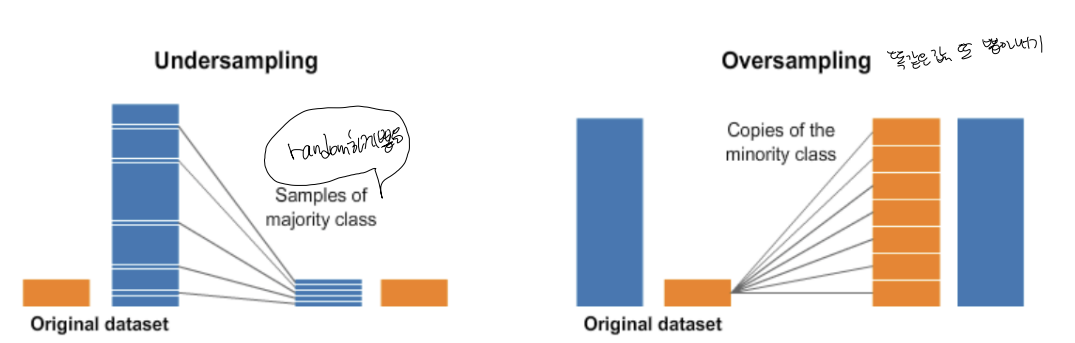

**< 주의할 점! >**

반드시 cross-validation을 한 후에 데이터를 증강시킨다.
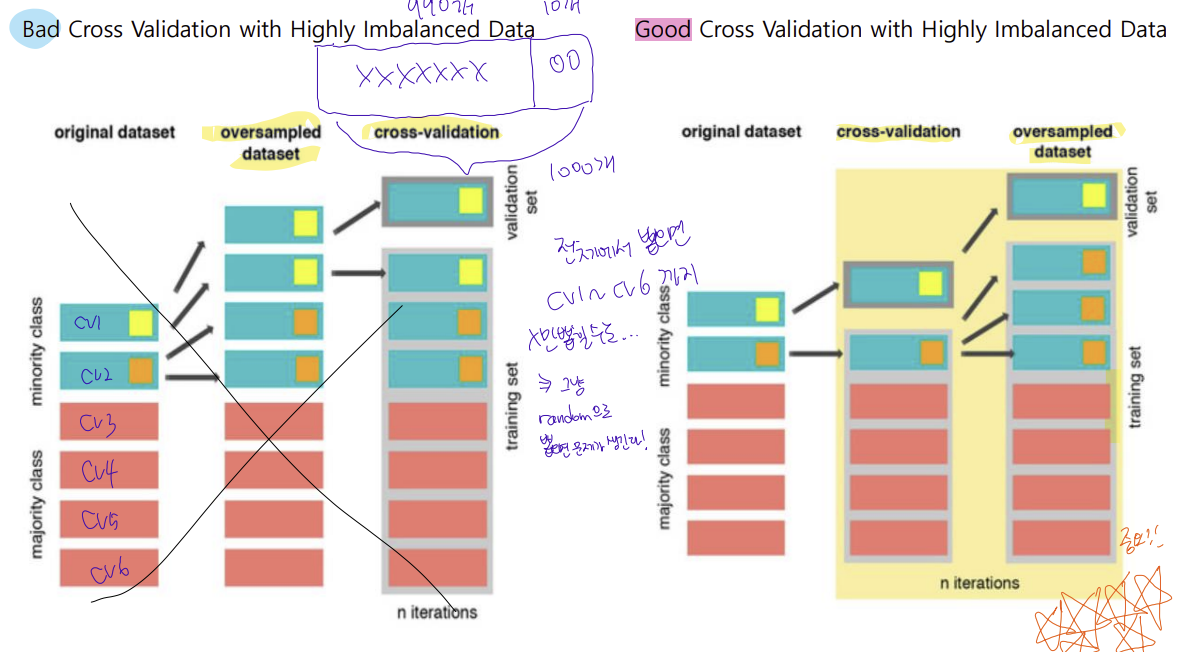

In [ ]:
# labels_unique = set(labels_all)
# print(f"unique labels: {labels_unique}")
# train_data['labels_sorted'] = [" ".join(sorted(lbs.split(" "))) for lbs in train_data['labels']]

# labels_combine = {}
# for comb in train_data['labels_sorted']:
#     labels_combine[comb] = labels_combine.get(comb, 0) + 1

# show_counts = '\n'.join(sorted(f'\t{k}: {v}' for k, v in labels_combine.items()))
# print(f"unique combinations: \n" + show_counts)
# print(f"total: {sum(labels_combine.values())}")

(-0.5, 959.5, 640.5, -0.5)

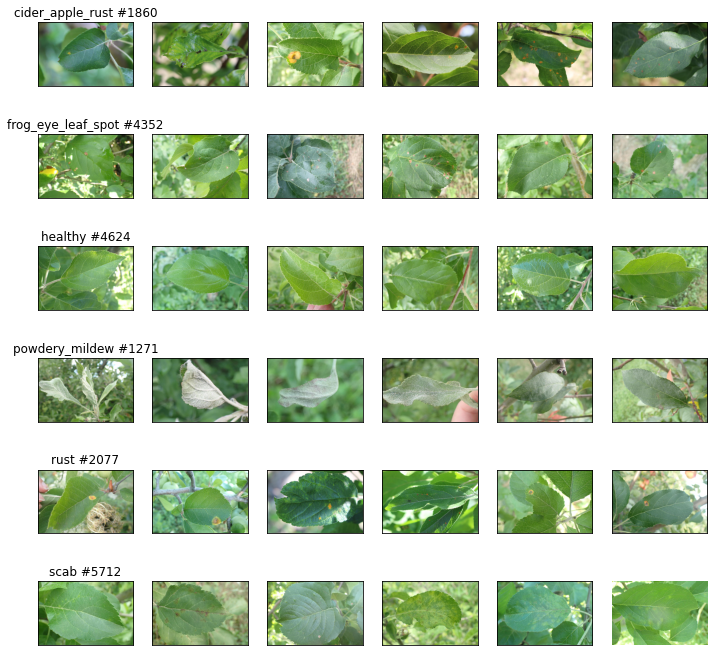

In [16]:
import matplotlib.pyplot as plt

nb_samples = 6
n, m = len(np.unique(data['labels'])), nb_samples,
fig, axarr = plt.subplots(nrows=n, ncols=m, figsize=(m * 2, n * 2))
for ilb, (lb, df_) in enumerate(data.groupby('labels')):
    img_names = list(df_['image'])
    for i in range(m):
        img_name = img_names[i]
        img = plt.imread(os.path.join(base_path, f"train_images/{img_name}"))
        axarr[ilb, i].imshow(img)
        if i == 0:
            axarr[ilb, i].set_title(f"{lb} #{len(df_)}")
        axarr[ilb, i].set_xticks([])
        axarr[ilb, i].set_yticks([])
plt.axis('off')

데이터셋 준비!

In [17]:
import collections
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(data['image'], data['labels']): 
            label_train = data['labels'].iloc[train_index]
            label_test = data['labels'].iloc[test_index]
            name_train = data['image'].iloc[train_index]
            name_test = data['image'].iloc[test_index]
train_labels = label_train
train_img_names=name_train
counts = collections.Counter(label_train) 
print(counts)
#train-val split
#Stratified K-fold 교차 검증방법
i=iter(skf.split(train_img_names, train_labels))
train_1, val_1 = next(i)
train_2, val_2 = next(i)
train_3, val_3 = next(i)
train_4, val_4 = next(i)
train_5, val_5 = next(i) 
counts=  collections.Counter(data.iloc[val_1]['labels']) 
print(counts)

Counter({'scab': 4569, 'healthy': 3700, 'frog_eye_leaf_spot': 3482, 'rust': 1661, 'cider_apple_rust': 1488, 'powdery_mildew': 1017})
Counter({'scab': 914, 'healthy': 740, 'frog_eye_leaf_spot': 697, 'rust': 332, 'cider_apple_rust': 297, 'powdery_mildew': 204})


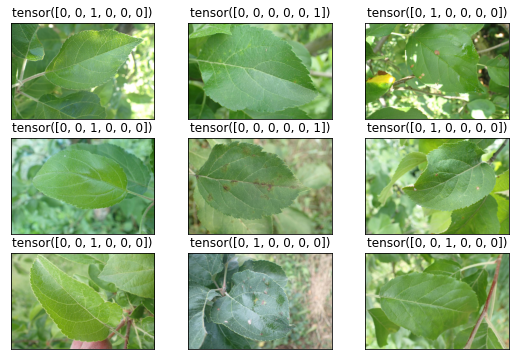

In [18]:
import os
import torch
from PIL import Image
from torch.utils.data import Dataset
from numpy import bincount
from torch.utils.data import WeightedRandomSampler
from sklearn.preprocessing import LabelEncoder
class PlantPathologyDataset(Dataset):
    def __init__(
        self,
        path_img_dir: str = os.path.join(base_path, 'train_images'),
        transforms = None,
        mode: str = 'train',
    ):
        self.path_img_dir = path_img_dir
        self.transforms = transforms
        self.mode = mode

        self.data = data
        labels_all = list(itertools.chain(*[lbs.split(" ") for lbs in self.data['labels']]))
        self.labels_unique = sorted(set(labels_all))
        self.labels_lut = {lb: i for i, lb in enumerate(self.labels_unique)}
        self.num_classes = len(self.labels_unique)

        # train-test split
        #https://stackoverflow.com/questions/45969390/difference-between-stratifiedkfold-and-stratifiedshufflesplit-in-sklearn
        from sklearn.model_selection import StratifiedKFold
        skf = StratifiedKFold(n_splits=5)
        for train_index, test_index in skf.split(self.data['image'], self.data['labels']): 
            label_train = data['labels'].iloc[train_index]
            label_test = data['labels'].iloc[test_index]
            name_train = data['image'].iloc[train_index]
            name_test = data['image'].iloc[test_index]
        self.train_labels = label_train
        self.train_img_names=name_train

        #train-val split
        #Stratified K-fold 교차 검증방법
        i=iter(skf.split(self.train_img_names, self.train_labels))
        train_1, val_1 = next(i)
        train_2, val_2 = next(i)
        train_3, val_3 = next(i)
        train_4, val_4 = next(i)
        train_5, val_5 = next(i)   
        self.data = self.data.iloc[train_2] if mode == 'train' else self.data.iloc[val_2] if mode=='val' else data.iloc[train_index]
        self.img_names=list(self.data['image'])
        self.labels= list(self.data['labels'])
    def to_one_hot(self, labels: str) -> tuple:
        one_hot = [0] * len(self.labels_unique)
        for lb in labels.split(" "):
            one_hot[self.labels_lut[lb]] = 1
        return tuple(one_hot)

    def __getitem__(self, idx: int) -> tuple:
        img_path = os.path.join(self.path_img_dir, self.img_names[idx])
        assert os.path.isfile(img_path)
        label = self.train_labels[idx]
        img = plt.imread(img_path)

        # augmentation
        if self.transforms:
            img = self.transforms(Image.fromarray(img))
        label = self.to_one_hot(label)
        return img, torch.tensor(label)

    def __len__(self) -> int:
        return len(self.data)

# ==============================
# ==============================

dataset = PlantPathologyDataset()

# quick view
fig = plt.figure(figsize=(9, 6))
for i in range(9):
    img, lb = dataset[i]
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img)
    ax.set_title(lb)

#================================
#================================


In [19]:
from torchvision import transforms as T
TRAIN_TRANSFORM = T.Compose([
    T.Resize(512),
    T.RandomPerspective(),
    T.RandomResizedCrop(224),
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    # T.Normalize([0.431, 0.498,  0.313], [0.237, 0.239, 0.227]),  # custom
])

VALID_TRANSFORM = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    # T.Normalize([0.431, 0.498,  0.313], [0.237, 0.239, 0.227]),  # custom
])

In [20]:
import torch
import torch.utils.data
import torchvision


class ImbalancedDatasetSampler(torch.utils.data.sampler.Sampler):
    """Samples elements randomly from a given list of indices for imbalanced dataset
    Arguments:
        indices (list, optional): a list of indices
        num_samples (int, optional): number of samples to draw
        callback_get_label func: a callback-like function which takes two arguments - dataset and index
    """

    def __init__(self, dataset, indices=None, num_samples=None, callback_get_label=None):
                
        # if indices is not provided, 
        # all elements in the dataset will be considered
        self.indices = list(range(len(dataset))) \
            if indices is None else indices

        # define custom callback
        self.callback_get_label = callback_get_label

        # if num_samples is not provided, 
        # draw `len(indices)` samples in each iteration
        self.num_samples = len(self.indices) \
            if num_samples is None else num_samples
            
        # distribution of classes in the dataset 
        label_to_count = {}
        for idx in self.indices:
            label = self._get_label(dataset, idx)
            if label in label_to_count:
                label_to_count[label] += 1
            else:
                label_to_count[label] = 1
                
        # weight for each sample
        weights = [1.0 / label_to_count[self._get_label(dataset, idx)]
                   for idx in self.indices]
        self.weights = torch.DoubleTensor(weights)

    def _get_label(self, dataset, idx):
        return dataset.labels[idx]
                
    def __iter__(self):
        return (self.indices[i] for i in torch.multinomial(
            self.weights, self.num_samples, replacement=True))

    def __len__(self):
        return self.num_samples

training dataset: 12733
validation dataset: 3184
test dataset: 15917
6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch labels: tensor([14,  7, 11,  8, 14, 10])
image size: torch.Size([3, 224, 224])


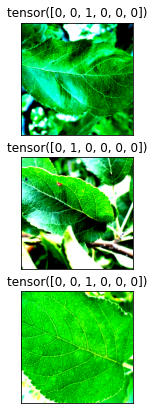

In [21]:
import multiprocessing as mproc
import pytorch_lightning as pl
from torch.utils.data import DataLoader

class PlantPathologyDM(pl.LightningDataModule):
    dataset_cls = PlantPathologyDataset

    def __init__(
        self,
        path_csv: str = os.path.join(base_path, 'train.csv'),
        path_img_dir: str = os.path.join(base_path, 'train_images'),
        batch_size: int = 64,
        num_workers: int = None,
    ):
        super().__init__()
        self.path_csv = path_csv
        self.path_img_dir = path_img_dir
        self.batch_size = batch_size
        self.num_workers = num_workers if num_workers is not None else mproc.cpu_count()
        self.train_dataset = None
        self.valid_dataset = None
        self.test_datset=None
    def prepare_data(self):
        pass

    @property
    def num_classes(self) -> int:
        assert self.train_dataset and self.valid_dataset
        return max(self.train_dataset.num_classes, self.valid_dataset.num_classes)

    def setup(self, stage=None):
        self.train_dataset = self.dataset_cls( self.path_img_dir, mode='train', transforms=TRAIN_TRANSFORM)
        print(f"training dataset: {len(self.train_dataset)}")
        self.valid_dataset = self.dataset_cls( self.path_img_dir, mode='val', transforms=VALID_TRANSFORM)
        print(f"validation dataset: {len(self.valid_dataset)}")
        self.test_dataset = self.dataset_cls( self.path_img_dir, mode='test', transforms=VALID_TRANSFORM)
        print(f"test dataset: {len(self.test_dataset)}")
    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            sampler=ImbalancedDatasetSampler(self.train_dataset)
        )

    def val_dataloader(self):
        return DataLoader(
            self.valid_dataset,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=False,
            sampler=ImbalancedDatasetSampler(self.valid_dataset)
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=False,
            sampler=ImbalancedDatasetSampler(self.test_dataset)
        )

# ==============================
# ==============================

dm = PlantPathologyDM()
dm.setup()
print(dm.num_classes)

#quick view
fig = plt.figure(figsize=(3, 7))
for imgs, lbs in dm.test_dataloader():
    # print(len(imgs))
    # print(lbs[0:3])
    print(f'batch labels: {torch.sum(lbs, axis=0)}')
    print(f'image size: {imgs[0].shape}')
    for i in range(3):
        ax = fig.add_subplot(3, 1, i + 1, xticks=[], yticks=[])
        # print(np.rollaxis(imgs[i].numpy(), 0, 3).shape)
        #print(np.amin(img[i]))
        ax.imshow(np.rollaxis(imgs[i].numpy(), 0, 3))
        ax.set_title(lbs[i])
    break

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())

##CNN Model

In [1]:
import torch
import torchmetrics
import torchvision
from torch import nn
from torch.nn import functional as F


class LitResnet(nn.Module):
    def __init__(self, arch: str, pretrained: bool = True, num_classes: int = 6):
        super().__init__()
        self.arch = arch
        self.num_classes = num_classes
        self.model = torchvision.models.__dict__[arch](pretrained=pretrained)
        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.model(x)


class LitPlantPathology(pl.LightningModule):

    def __init__(self, model, lr: float = 1e-4):
        super().__init__()
        self.model = model
        self.arch = self.model.arch
        self.num_classes = self.model.num_classes
        self.train_accuracy = torchmetrics.Accuracy()
        self.val_accuracy = torchmetrics.Accuracy()
        self.val_f1_score = torchmetrics.F1Score(self.num_classes)
        self.learn_rate = lr
        self.loss = nn.BCEWithLogitsLoss()

    def forward(self, x):
        return F.sigmoid(self.model(x))

    def compute_loss(self, y_hat, y):
        return self.loss(y_hat, y.to(float))

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.compute_loss(y_hat, y)
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", self.train_accuracy(y_hat, y), prog_bar=False)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.compute_loss(y_hat, y)
        self.log("valid_loss", loss, prog_bar=False)
        self.log("valid_acc", self.val_accuracy(y_hat, y), prog_bar=True)
        self.log("valid_f1", self.val_f1_score(y_hat, y), prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=self.learn_rate)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, self.trainer.max_epochs, 0)
        return [optimizer], [scheduler]

# ==============================
# ==============================

# see: https://pytorch.org/vision/stable/models.html
net = LitResnet(arch='resnet50', num_classes=dm.num_classes).to(device)
# print(net)
model = LitPlantPathology(model=net)

NameError: ignored

In [ ]:
logger = pl.loggers.CSVLogger(save_dir='logs/', name=model.arch)
n_iter =0
# ==============================
swa = pl.callbacks.StochasticWeightAveraging(swa_epoch_start=0.6)
ckpt = pl.callbacks.ModelCheckpoint(
    monitor='valid_f1',
    save_top_k=1,
    save_last=True,
    # save_weights_only=True,
    filename='checkpoint/{epoch:02d}-{valid_acc:.4f}-{valid_f1:.4f}',
    # verbose=False,
    mode='max',
)
trainer = pl.Trainer(
    # fast_dev_run=True,
    gpus=1,
    # tpu_cores=8,
    callbacks=[ckpt,swa],
    logger=logger,
    max_epochs=8,
    precision=16,
    accumulate_grad_batches=8,
    val_check_interval=0.25,
    progress_bar_refresh_rate=1,
    weights_summary='top',
)

# ==============================

# trainer.tune(model, datamodule=dm)

trainer.fit(model=model, datamodule=dm)

In [ ]:
trainer.save_checkpoint('fold1.ckpt')

In [ ]:
class MyLightningModule(LitPlantPathology):
    def __init__(self, *args, **kwargs):
        super().__init__()
        self.save_hyperparameters()
checkpoint = torch.load(os.path.join(base_path, 'example.ckpt'))
#print(checkpoint['state_dict'])

In [ ]:
new_model = LitPlantPathology(model=net)
new_weights = new_model.state_dict()
old_weights = list(checkpoint['state_dict'].items())

i=0
for k, _ in new_weights.items():
    new_weights[k] = old_weights[i][1]
    i += 1

new_model.load_state_dict(new_weights)

In [ ]:
labels_all=list(itertools.chain(*[lbs.split(" ") for lbs in train_data['labels']]))
labels_unique = sorted(set(labels_all))
labels_lut = {lb: i for i, lb in enumerate(labels_unique)}
num_classes = len(labels_unique)
categories=[k for k,v in labels_lut.items()]

In [ ]:
preds = []
dm_test.batch_size = 8
model.eval()
y_pred=[]
for imgs, names in dm_test.test_dataloader():
    with torch.no_grad():
        imgs=imgs.cuda()
        encode = model(imgs)
    print(np.round(encode.cpu().detach().numpy(), decimals=2))
    def onehot_to_label(val): 
      return [k for k,v in labels_lut.items() if v == np.argmax(val.cpu().detach().numpy())]
    for be, name in zip(encode, file_list):
        lbs = onehot_to_label(be) #여기서 be는 encode 원소들 즉, 예측결과
        preds.append(dict(image=name, labels=" ".join(lbs)))
        y_pred.append(lbs[0])
    break

df_preds = pd.DataFrame(preds)
print(df_preds.head())

In [ ]:
data = {'y_Actual':    list(test_data['labels'].values),
        'y_Predicted': y_pred,
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

In [ ]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)